**In this assignment, I got to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two logistic regression models- Binary and Multi-class Classification Using Logistic Regression.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 


<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Logistic Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a classification model using Logistic Regression to predict the target variable `RainTomorrow` from the dataset.

> **Q1.5.** Evaluate and discuss the model performance 

### Q.1 Preprocessing and cleaning the dataset

In [433]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy import stats

In [434]:
# the dataset we are going to be loading in is the Weather dataset. We use the pandas.
weather_df = pd.read_csv("weatherAUS.csv")
weather_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No
5,9/28/2011,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,...,86.0,1002.0,995.5,8.0,7.0,18.1,18.5,No,5.6,Yes
6,10/13/2011,Nuriootpa,9.8,23.9,0.0,4.4,10.5,SE,35.0,ENE,...,29.0,1017.8,1013.9,3.0,4.0,15.5,23.0,No,0.2,No
7,4/8/2010,NorahHead,18.7,27.6,3.0,NaN,NaN,SSE,41.0,WNW,...,64.0,1013.2,1011.0,NaN,NaN,22.4,24.0,Yes,0.2,No
8,10/19/2009,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,...,48.0,1020.9,1018.0,4.0,2.0,27.4,27.9,No,0.0,No
9,2/23/2010,MountGambier,8.5,22.9,1.4,4.2,12.5,SSW,41.0,SSE,...,41.0,1023.1,1022.1,1.0,2.0,16.4,22.1,Yes,0.0,No


In [435]:
#to get the shape of the dataset
weather_df.shape

(36881, 24)

According to the above result, our dataset contains 24 total columns and 36,881 observations. Based on the little investigation using the head function, there are certain missing values.

In [436]:
weather_df.RainTomorrow.value_counts()

RainTomorrow
No     27732
Yes     8529
Name: count, dtype: int64

From the output, we see that the target variable "RainTomorrow" has two unique identifiers, "No" and "Yes", which says if it is going to rain tomorrow or not. 

#### Dealing with missing values

In [437]:
# to deal with missing values, we first check and investigate each columns to see which ones contain missing value. 
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

From the above results, there seems to be a lot of missing values in certain columns, some more enormous than others. Now we deal with missing values. Imputation is going to be used in dealing with missing values, we used the mean of all the numerical values per each columns and used that to replace the NAN values we have. Then for the categorical variables, we use the mode, we use the highest occuring value as replacement.

In [438]:
# Dealing with missing data
# numerical variables
numerical_columns = weather_df.select_dtypes(include=['float64', 'int64'])
numerical_columns

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0.0
1,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,0.0
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0.2
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0.0
4,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,9.0
36877,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,0.0
36878,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,0.0
36879,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,0.0


In [439]:
# Imputing numerical variables
numimputed=numerical_columns.fillna(numerical_columns.mean())
numimputed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.000000,1.000000,9.1,13.3,0.0
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,4.331488,4.462321,1.3,13.7,0.0
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.000000,4.000000,22.7,24.4,0.2
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.000000,1.000000,20.0,26.1,0.0
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,4.331488,4.462321,22.2,22.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.000000,8.000000,10.4,13.9,9.0
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.000000,1.000000,18.4,23.5,0.0
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.000000,5.000000,25.7,30.5,0.0
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.000000,1.000000,16.4,20.9,0.0


In [440]:
numimputed.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

After replacing as discussed earlier, we can now see that there are no more missing values for all numerical/quantitative variables.

In [441]:
# Dealing with missing data
# numerical variables
categorical_columns = weather_df.select_dtypes(exclude=['float64', 'int64'])
categorical_columns

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,7/3/2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,9/9/2010,GoldCoast,NNW,WNW,N,No,No
...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,NNE,NNE,N,Yes,Yes
36877,9/24/2010,PerthAirport,W,N,WSW,No,No
36878,5/6/2011,Darwin,E,E,ESE,No,No
36879,10/12/2010,Perth,SSW,E,SSW,No,No


In [442]:
# Imputation for categorical variables 
cat_imputed=categorical_columns.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_imputed

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,7/3/2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,9/9/2010,GoldCoast,NNW,WNW,N,No,No
...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,NNE,NNE,N,Yes,Yes
36877,9/24/2010,PerthAirport,W,N,WSW,No,No
36878,5/6/2011,Darwin,E,E,ESE,No,No
36879,10/12/2010,Perth,SSW,E,SSW,No,No


In [443]:
cat_imputed.isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

All missing categorical values have been replaced using the mode, we can now see that there are no more missing values for all categorical variables.

In [444]:
CombineData = pd.concat([numimputed, cat_imputed], axis=1)
CombineData

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RISK_MM,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,...,9.1,13.3,0.0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,...,1.3,13.7,0.0,7/3/2009,Launceston,SSW,E,SW,No,No
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,...,22.7,24.4,0.2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,...,20.0,26.1,0.0,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,...,22.2,22.6,0.4,9/9/2010,GoldCoast,NNW,WNW,N,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,...,10.4,13.9,9.0,6/14/2011,Perth,NNE,NNE,N,Yes,Yes
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,...,18.4,23.5,0.0,9/24/2010,PerthAirport,W,N,WSW,No,No
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,...,25.7,30.5,0.0,5/6/2011,Darwin,E,E,ESE,No,No
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,...,16.4,20.9,0.0,10/12/2010,Perth,SSW,E,SSW,No,No


In [445]:
CombineData["RainTomorrow"].replace({'No': 0, 'Yes': 1}, inplace=True)

Binary classification has happened on the target variable, 0 has been used to replace "No" and 1 has been used to replace "Yes"

#### Dealing with unnecessary data

In [446]:
# Dealing with unnecessary data
CombineData.drop(columns=["Date", "Location"], inplace=True)

In [447]:
CombineData

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,...,1.000000,1.000000,9.1,13.3,0.0,NW,WSW,SSE,No,0
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,...,4.331488,4.462321,1.3,13.7,0.0,SSW,E,SW,No,0
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,...,6.000000,4.000000,22.7,24.4,0.2,SSE,SSE,SSE,No,0
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,...,6.000000,1.000000,20.0,26.1,0.0,SW,SSE,SW,No,0
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,...,4.331488,4.462321,22.2,22.6,0.4,NNW,WNW,N,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,...,7.000000,8.000000,10.4,13.9,9.0,NNE,NNE,N,Yes,1
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,...,1.000000,1.000000,18.4,23.5,0.0,W,N,WSW,No,0
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,...,2.000000,5.000000,25.7,30.5,0.0,E,E,ESE,No,0
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,...,0.000000,1.000000,16.4,20.9,0.0,SSW,E,SSW,No,0


Here, I successfully dropped columns that do not have any direct influence or impact on our prediction and modelling, which was the LOCATION and DATE columns.

#### Dealing with Outliers

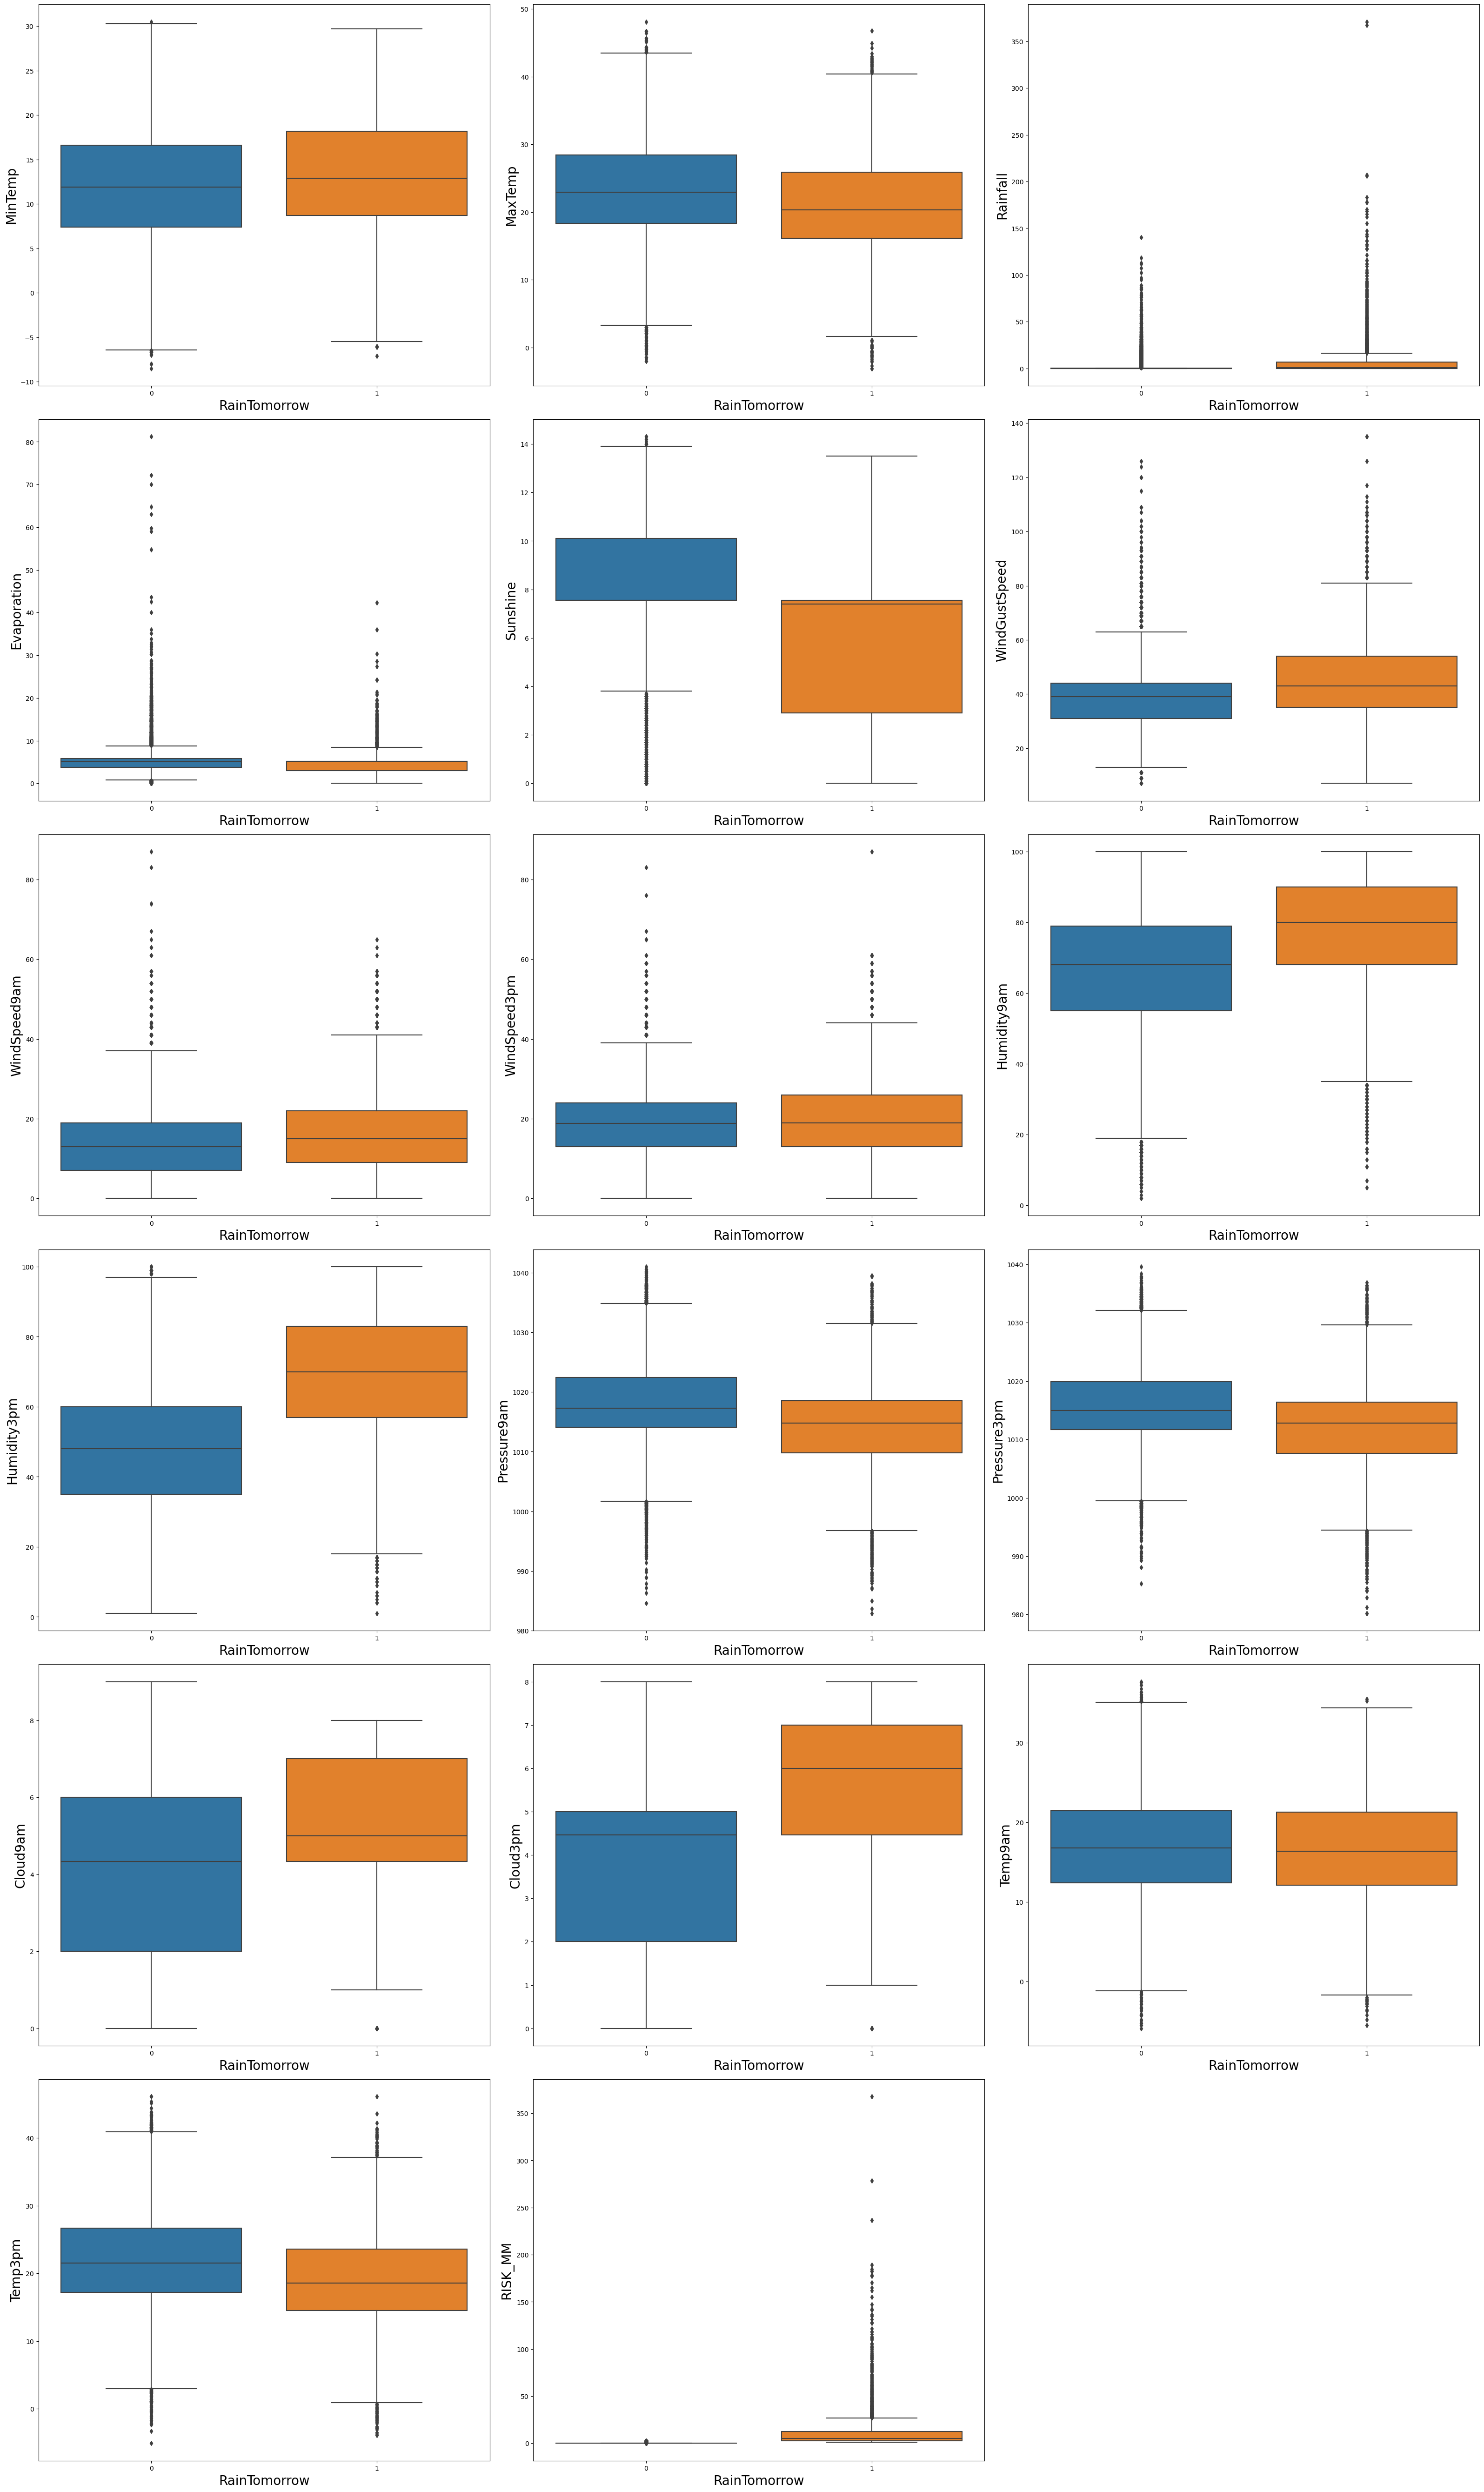

In [448]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=for_viz, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

The outliers that were captured in the Boxplot visualization, might have an impact on the predictions if we choose to drop them by deleting them, so we are going to asusme they are going to be pivotal in the prediction of whether it is going to rain tomorrow or not.

#### Dealing with inconsistent data

In [449]:
#Dealing with inconsistent data, we use the describe function
categorical_columns = CombineData.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = CombineData[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in WindGustDir: ['NW' 'SSW' 'SSE' 'SW' 'NNW' 'N' 'SE' 'E' 'S' 'WSW' 'W' 'NE' 'NNE' 'WNW'
 'ESE' 'ENE']
Unique values in WindDir9am: ['WSW' 'E' 'SSE' 'WNW' 'ENE' 'ESE' 'NW' 'N' 'NE' 'SE' 'NNW' 'W' 'NNE' 'S'
 'SW' 'SSW']
Unique values in WindDir3pm: ['SSE' 'SW' 'N' 'NNE' 'S' 'E' 'W' 'SE' 'NW' 'ESE' 'NE' 'ENE' 'WSW' 'WNW'
 'SSW' 'NNW']
Unique values in RainToday: ['No' 'Yes']


From our output, it's shown that for all Categorical variables, there are not repitition of values, maybe as a result of a typo, each unique values have it's own meaning which makes it consistent with respect to the Column name and the information it carries.

#### Extracting the independent and dependent variable

In [450]:
X = CombineData.drop("RainTomorrow", axis=1)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,...,1022.2,1.000000,1.000000,9.1,13.3,0.0,NW,WSW,SSE,No
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,...,1002.4,4.331488,4.462321,1.3,13.7,0.0,SSW,E,SW,No
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,...,1021.9,6.000000,4.000000,22.7,24.4,0.2,SSE,SSE,SSE,No
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,...,1014.9,6.000000,1.000000,20.0,26.1,0.0,SW,SSE,SW,No
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,...,1015.0,4.331488,4.462321,22.2,22.6,0.4,NNW,WNW,N,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,...,1014.5,7.000000,8.000000,10.4,13.9,9.0,NNE,NNE,N,Yes
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,...,1021.5,1.000000,1.000000,18.4,23.5,0.0,W,N,WSW,No
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,...,1009.0,2.000000,5.000000,25.7,30.5,0.0,E,E,ESE,No
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,...,1019.9,0.000000,1.000000,16.4,20.9,0.0,SSW,E,SSW,No


In [451]:
y = CombineData['RainTomorrow'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Encoding the categorical data in the independent variable

In [452]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_variables = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

ct = ColumnTransformer([('cat_encoder', OneHotEncoder(), cat_variables)], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[ 0. ,  0. ,  0. , ...,  9.1, 13.3,  0. ],
       [ 0. ,  0. ,  0. , ...,  1.3, 13.7,  0. ],
       [ 0. ,  0. ,  0. , ..., 22.7, 24.4,  0.2],
       ...,
       [ 1. ,  0. ,  0. , ..., 25.7, 30.5,  0. ],
       [ 0. ,  0. ,  0. , ..., 16.4, 20.9,  0. ],
       [ 0. ,  0. ,  0. , ..., 16.7, 25.3,  0. ]])

#### Q1.2 Visualizing the Dataset

In [453]:
rain_t = CombineData['RainTomorrow']
for_viz = pd.concat([numimputed, rain_t], axis=1)

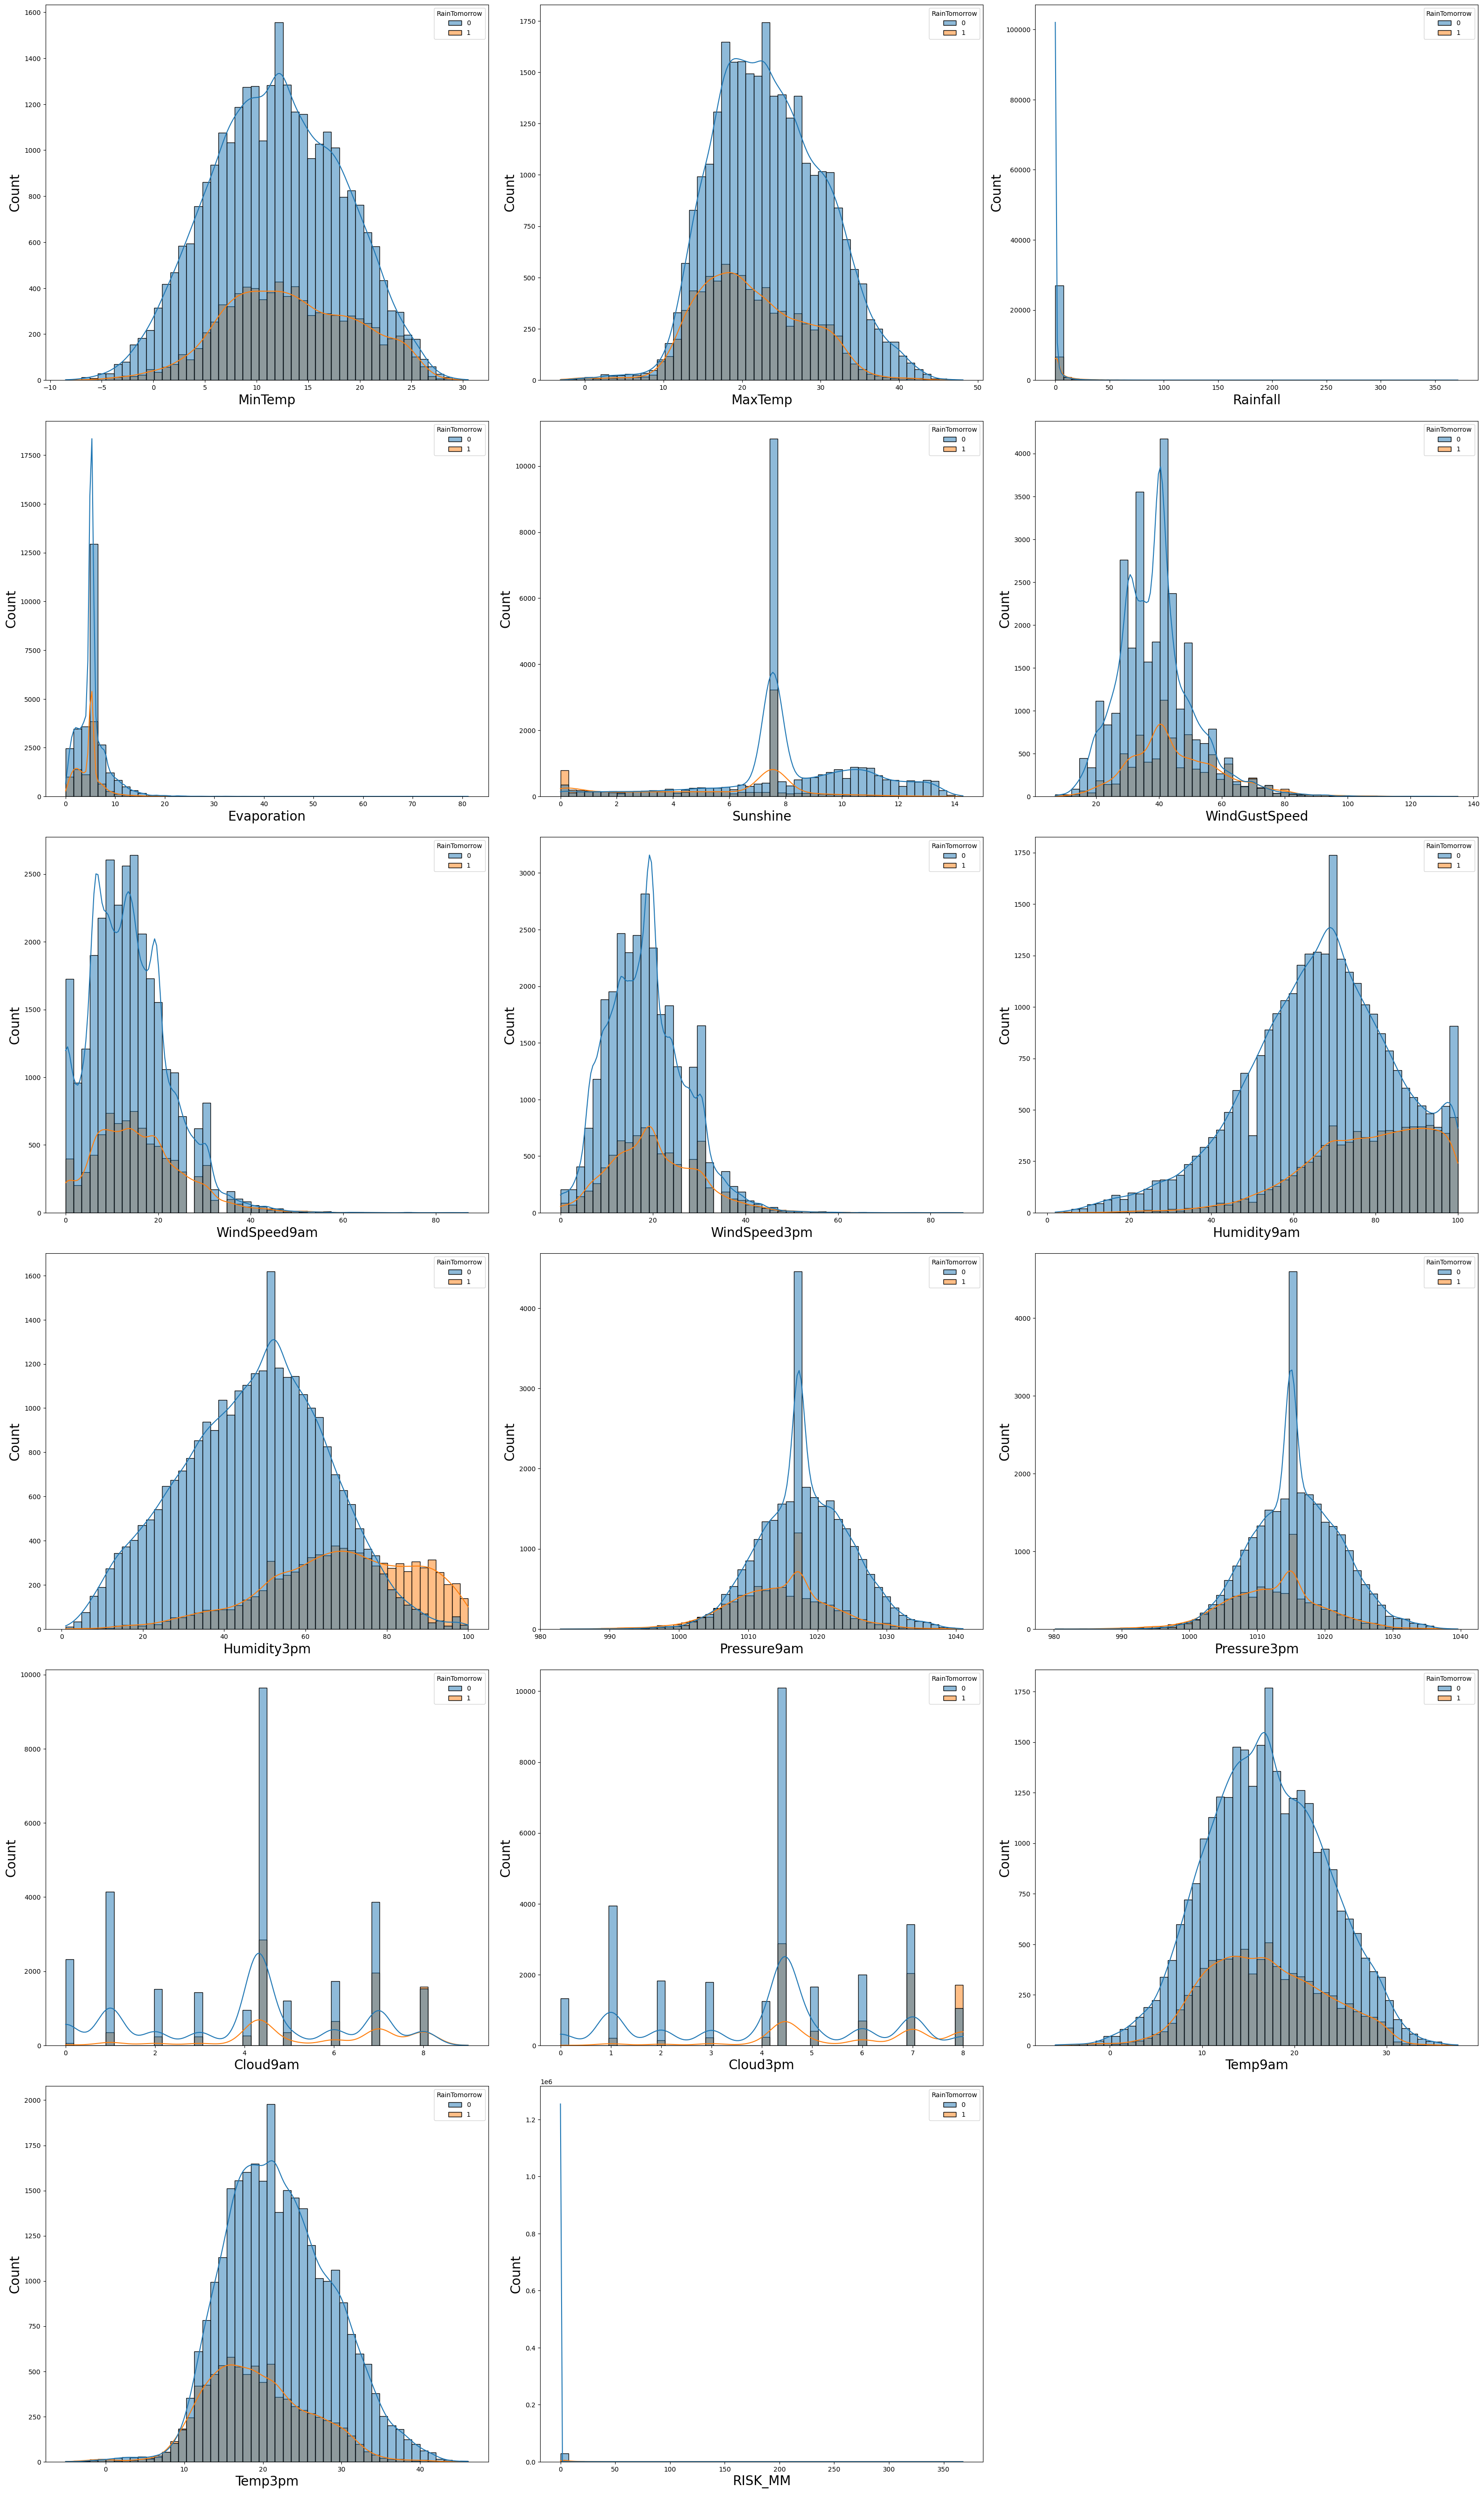

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert X array to DataFrame
#X_df = pd.DataFrame(X)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(for_viz, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()


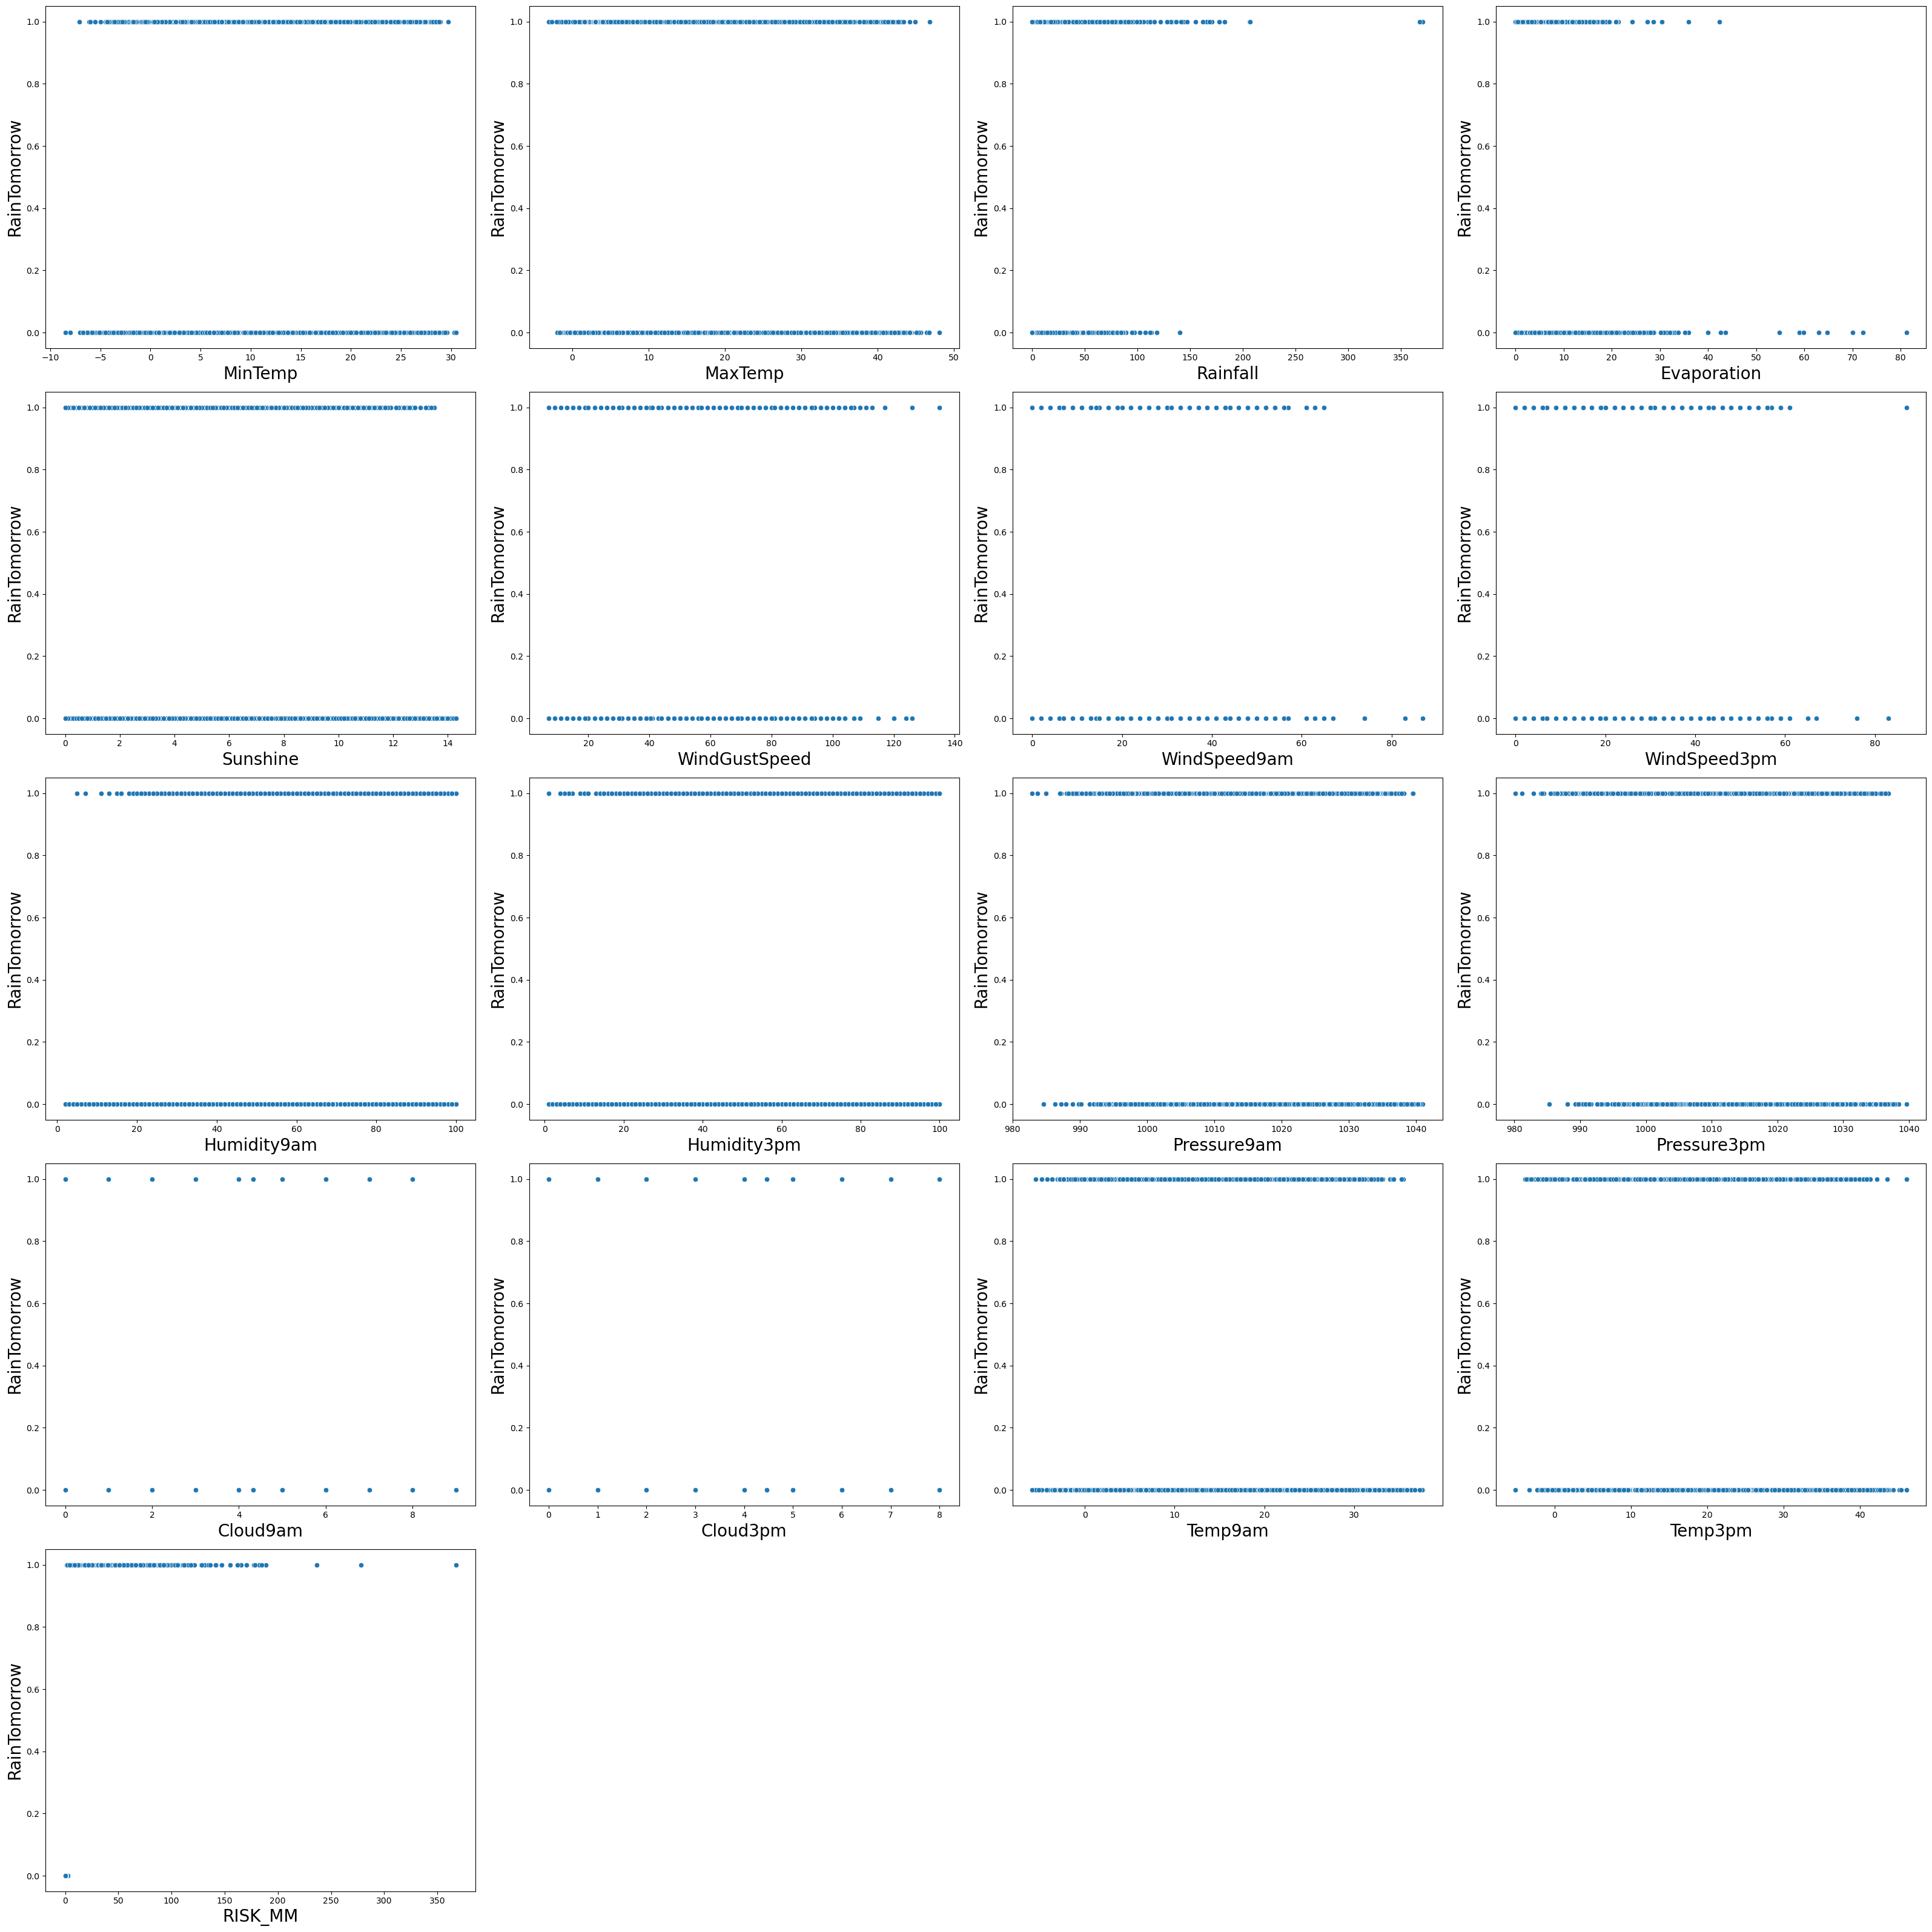

In [455]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 32))

num_cols = 4
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=for_viz, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()

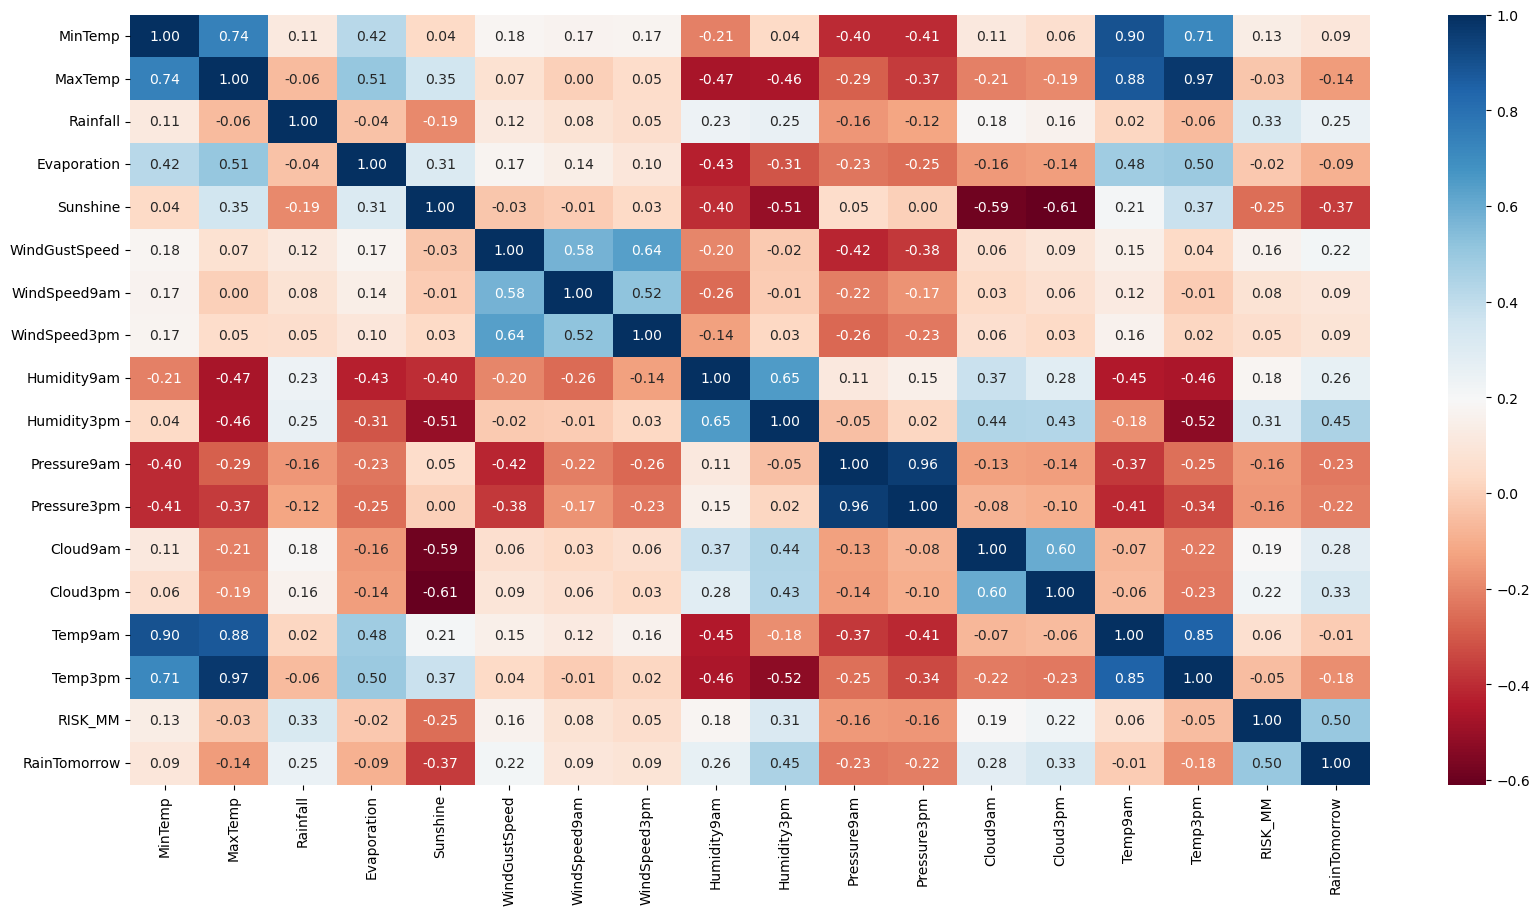

In [456]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(for_viz.corr(), cmap='RdBu', annot=True, fmt=".2f");

#### Q1.4 Discussing the preliminary observations based on the Data Visualizations above.

#### Histogram 
From the histogram viz, we can see that some of the plots like Min and max temp, the humidity and the Temp9am and 3pm are evenly distributed, and not skewed.
#### Scatter plot
The scatter plot shows that there are only two variables in the y-axis, so wether it is going to rain or not, from the Risk MM, we can see that whenever there is a high risk, it tends to rain.
#### Heatmap
The heatmap shows the correlation of all the independent numerical variables being compared with the response variable (RainTomorrow). We can see that the Risk MM has a medium correlation with the Rain Tomorrow as opposed to the other variables.

In [515]:
for_viz.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
count,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748,0.231257
std,6.360484,6.965300,9.003926,3.039708,3.048330,12.918408,8.915889,8.714508,18.158779,20.175837,6.821420,6.728137,2.316198,2.143717,6.385744,6.779665,8.864800,0.421642
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000,0.000000
25%,7.700000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,1013.100000,1010.700000,3.000000,3.000000,12.300000,16.500000,0.000000,0.000000
50%,12.200000,22.400000,0.000000,5.189544,7.544688,40.390573,13.000000,19.000000,70.000000,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.700000,21.000000,0.000000,0.000000
75%,17.000000,27.900000,1.000000,5.600000,9.400000,46.000000,19.000000,24.000000,82.000000,66.000000,1021.700000,1019.200000,6.000000,6.000000,21.400000,26.100000,1.000000,0.000000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000,1.000000


From what I observed, there is an indication that there is variability in the weather variables, especially in Rainfall, which is likely an important predictor for RainTomorrow. The relatively low mean and median values for Rainfall suggest that most days do not have significant rainfall, but there are days with notably high rainfall amounts, as indicated by the large standard deviation and wide range.

#### Q1.4 Building a classification model using Logistic Regression

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
# fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [460]:
# predicting the class for the test data
y_pred = logre.predict(X_test)

In [461]:
custom_threshold = 0.3
y_pred_custom = (logre.predict_proba(X_test)[:, 1] > custom_threshold).astype(int)

# In logistic regression, the predict_proba method returns 
# the probability estimates for each class. 
# For binary classification tasks, there are two classes (0 and 1). 
# The [:, 1] indexing is used to extract the probabilities corresponding 
# to the positive class (class 1).

In [462]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9575708282499661


In [463]:
print(accuracy_score(y_test,y_pred_custom))

0.9657042158058832


In [464]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5647
           1       0.92      0.89      0.91      1730

    accuracy                           0.96      7377
   macro avg       0.95      0.93      0.94      7377
weighted avg       0.96      0.96      0.96      7377



[[5520  127]
 [ 186 1544]]


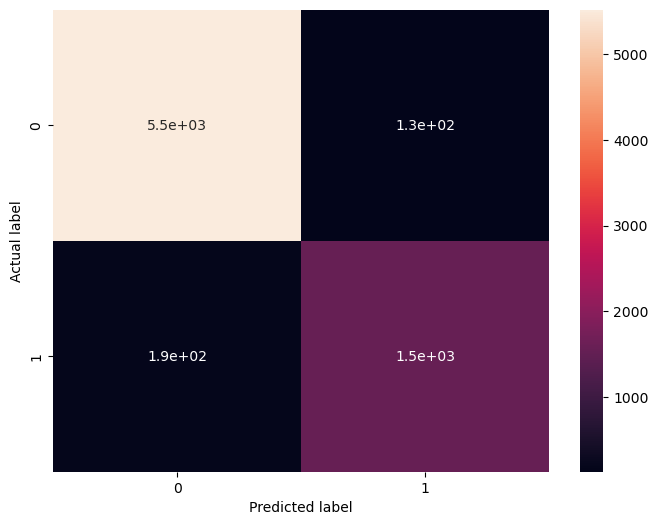

In [465]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

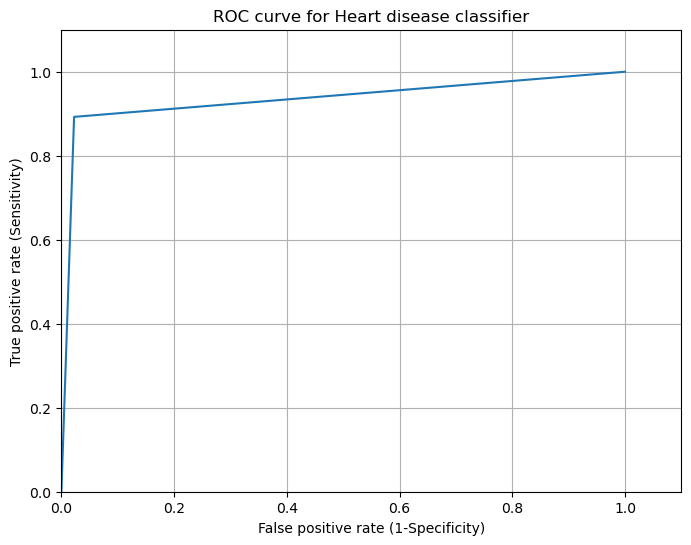

In [466]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

#### Q1.5 Evaluating and discussing the model

For y_pred, the accuracy score is approximately 95.76%, and this means that the model correctly predicts the target variable for about 95.76% of the samples in the test dataset.
For y_pred_custom, the accuracy score is slightly higher, around 96.57%, suggesting a slightly better performance compared to y_pred.

Precision: For class 0 (no rain tomorrow), precision is high at 97%, indicating few false positives. For class 1 (rain tomorrow), precision is slightly lower at 92%, suggesting a higher false positive rate.

Recall: In recall, the class 0 has a high recall of 98%, whcih means that there will be a detection of instances with no rain tomorrow. However, class 1 has a lower recall of 89%, suggesting some instances of rain tomorrow are missed.

F1-score: Both of my F1-scores are high, which is indicating good overall performance.

The confusion matrix is just providing a more detailed breakdown of predictions by class. 
For class 0 (no rain tomorrow), there are 5520 true negatives (TN)
127 false negatives (FN)
For class 1 (rain tomorrow), there are 186 false positives (FP)
1544 true positives (TP).

The ROC Curve gears towards the y-axis of 1, which indicates that it is a very good fit.

# Question 2: Multi-Class Classification Using Logistic Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 
        
> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Build a classification model using Logistic Regression to predict the penguins species.

> **Q2.5.** Evaluate and discuss the model performance 

In [521]:
# the dataset we are going to be loading in is the Weather dataset. We use the pandas.
penguins = pd.read_csv("penguins.csv")
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [522]:
penguins.shape

(344, 7)

In [523]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

#### Q.1 Preprocessing and Data exploration

#### Dealing with missing values

In [524]:
# Dealing with missing data
# numerical variables
penguins_numerical = penguins.select_dtypes(include=['float64', 'int64'])
penguins_numerical=penguins_numerical.fillna(penguins_numerical.mean())
penguins_numerical

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [525]:
penguins_numerical.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [526]:
# Dealing with missing data
# numerical variables
penguins_categorical = penguins.select_dtypes(exclude=['float64', 'int64'])
penguins_categorical=penguins_categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))
penguins_categorical

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,MALE
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


In [527]:
penguins_categorical.isnull().sum()

species    0
island     0
sex        0
dtype: int64

In [528]:
NewPenguins = pd.concat([penguins_numerical, penguins_categorical], axis=1)
NewPenguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
0,39.10000,18.70000,181.000000,3750.000000,Adelie,Torgersen,MALE
1,39.50000,17.40000,186.000000,3800.000000,Adelie,Torgersen,FEMALE
2,40.30000,18.00000,195.000000,3250.000000,Adelie,Torgersen,FEMALE
3,43.92193,17.15117,200.915205,4201.754386,Adelie,Torgersen,MALE
4,36.70000,19.30000,193.000000,3450.000000,Adelie,Torgersen,FEMALE
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,Gentoo,Biscoe,MALE
340,46.80000,14.30000,215.000000,4850.000000,Gentoo,Biscoe,FEMALE
341,50.40000,15.70000,222.000000,5750.000000,Gentoo,Biscoe,MALE
342,45.20000,14.80000,212.000000,5200.000000,Gentoo,Biscoe,FEMALE


In [529]:
NewPenguins.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species              0
island               0
sex                  0
dtype: int64

#### Dealing with unnecessary data

In [530]:
# Dealing with unnecessary data (dropping the 'sex' column)
NewPenguins.drop(columns=['sex'], inplace=True)

#### Checking for outliers

In [531]:
penguins_specie = NewPenguins['species']
for_viz2 = pd.concat([penguins_numerical, penguins_specie], axis=1)

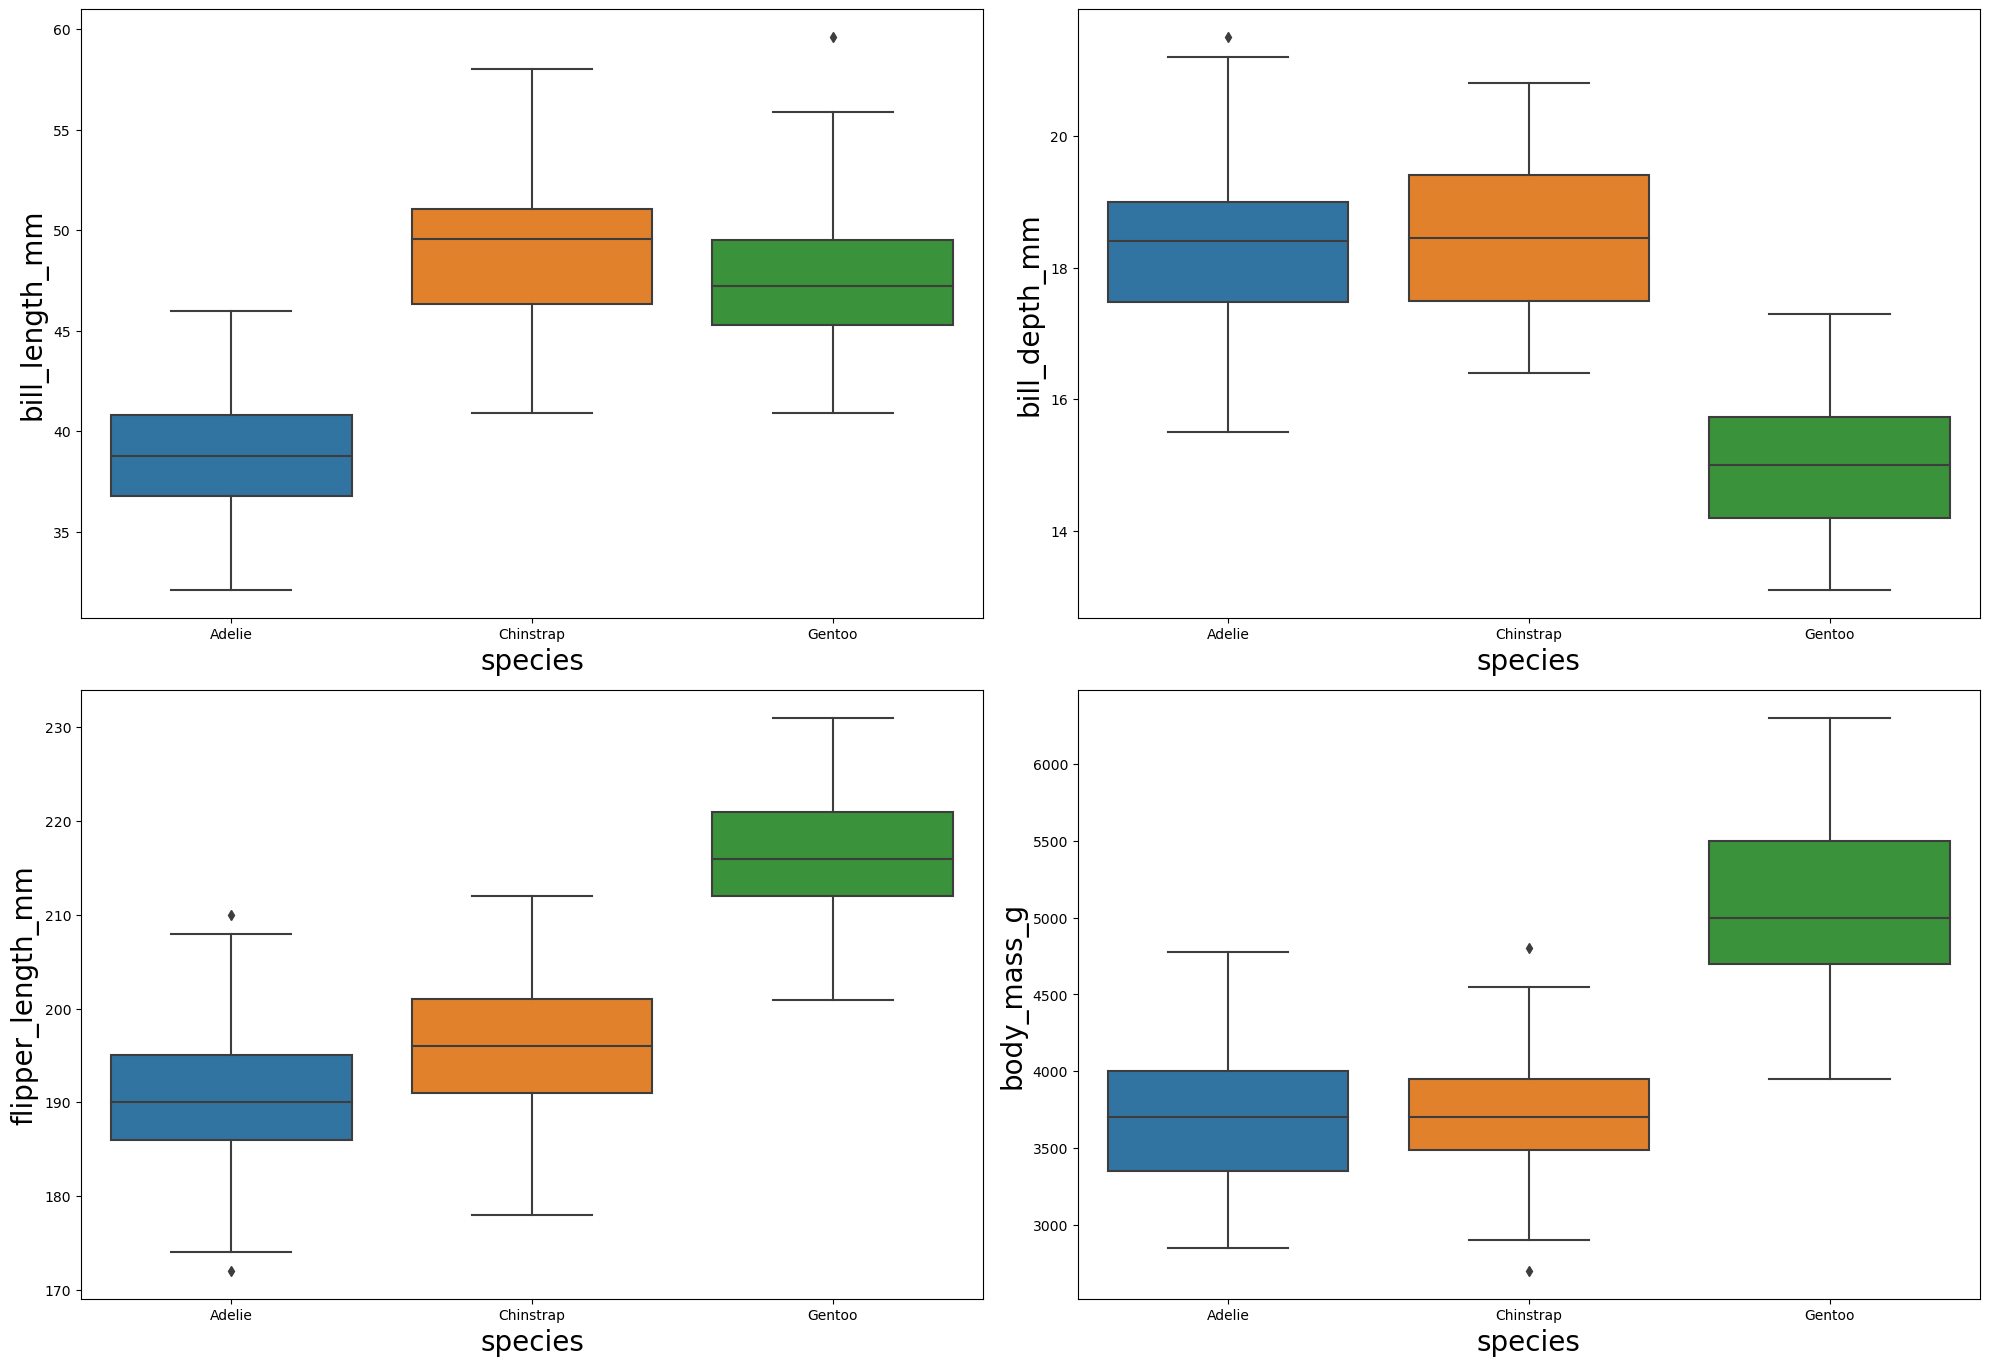

In [532]:
plt.figure(figsize=(20, 20))

num_cols = 2
num_rows = int(for_viz2.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz2.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=for_viz2, x='species', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('species', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

Based on the boxplot visualization, we do not have enormous outliers and they can be ignoredsince they could have an high influence on our modelling.

#### Dealing with inconsistent data

In [533]:
#Dealing with inconsistent data, we use the describe function
categorical_columns = NewPenguins.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = NewPenguins[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in species: ['Adelie' 'Chinstrap' 'Gentoo']
Unique values in island: ['Torgersen' 'Biscoe' 'Dream']


From the result, we see that there are no inconsistencies with the values. They are all unique and all represent different meaning. 

In [534]:
NewPenguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island
0,39.10000,18.70000,181.000000,3750.000000,Adelie,Torgersen
1,39.50000,17.40000,186.000000,3800.000000,Adelie,Torgersen
2,40.30000,18.00000,195.000000,3250.000000,Adelie,Torgersen
3,43.92193,17.15117,200.915205,4201.754386,Adelie,Torgersen
4,36.70000,19.30000,193.000000,3450.000000,Adelie,Torgersen
...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,Gentoo,Biscoe
340,46.80000,14.30000,215.000000,4850.000000,Gentoo,Biscoe
341,50.40000,15.70000,222.000000,5750.000000,Gentoo,Biscoe
342,45.20000,14.80000,212.000000,5200.000000,Gentoo,Biscoe


#### Seperating the independent and dependent varialbe.

In [535]:
X = NewPenguins.drop(["species"], axis=1)
y= NewPenguins["species"]

In [536]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,39.10000,18.70000,181.000000,3750.000000,Torgersen
1,39.50000,17.40000,186.000000,3800.000000,Torgersen
2,40.30000,18.00000,195.000000,3250.000000,Torgersen
3,43.92193,17.15117,200.915205,4201.754386,Torgersen
4,36.70000,19.30000,193.000000,3450.000000,Torgersen
...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,Biscoe
340,46.80000,14.30000,215.000000,4850.000000,Biscoe
341,50.40000,15.70000,222.000000,5750.000000,Biscoe
342,45.20000,14.80000,212.000000,5200.000000,Biscoe


#### Encoding the data

In [537]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
# Convert X to a pandas DataFrame
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

# Define the categorical columns to be encoded
cat_columns = ['island']

# Create transformers for encoding categorical columns and scaling numerical columns
ct = ColumnTransformer([('cat_encoder', OneHotEncoder(), cat_columns)], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [538]:
X

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 1.87e+01, 1.81e+02, 3.75e+03],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.74e+01, 1.86e+02, 3.80e+03],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.80e+01, 1.95e+02, 3.25e+03],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.57e+01, 2.22e+02, 5.75e+03],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.48e+01, 2.12e+02, 5.20e+03],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.61e+01, 2.13e+02, 5.40e+03]])

In [539]:
from sklearn.preprocessing import LabelEncoder

# Define a label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(y2)

In [540]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#### Q2.2 Visualizing the dataset


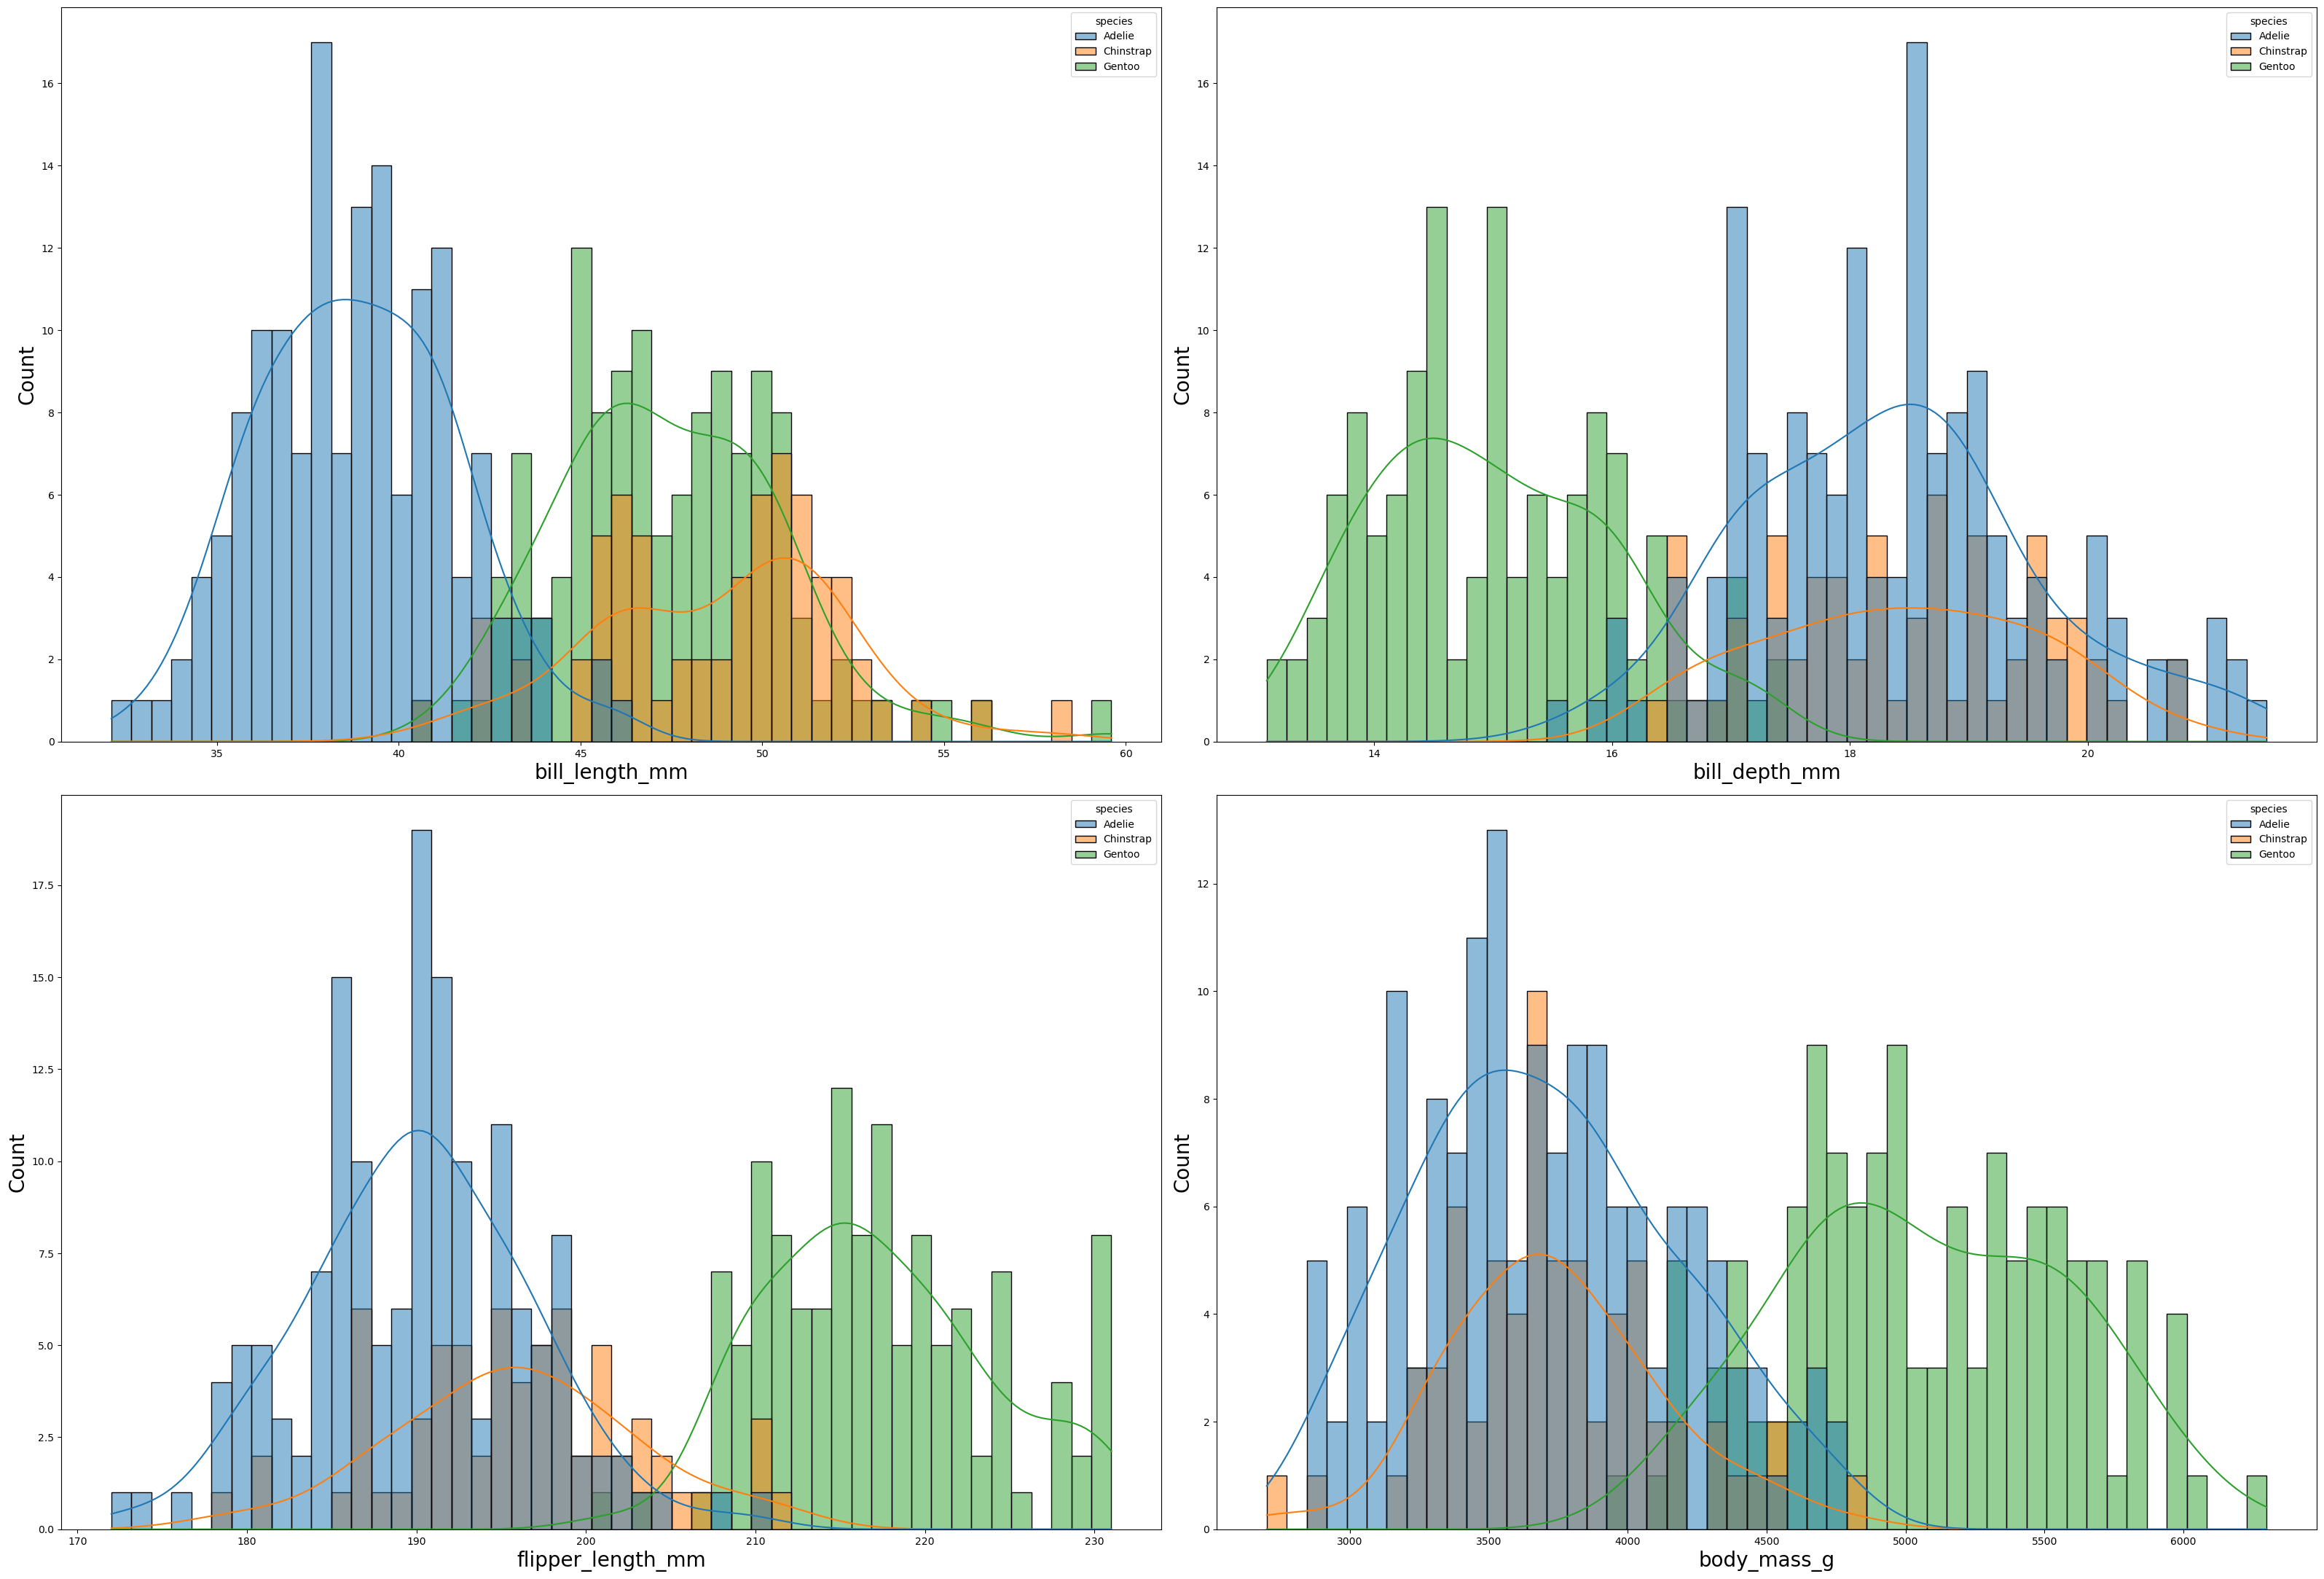

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(32, 32))

num_cols = 2
num_rows = int(for_viz2.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz2.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(for_viz2, x=col, hue='species', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()


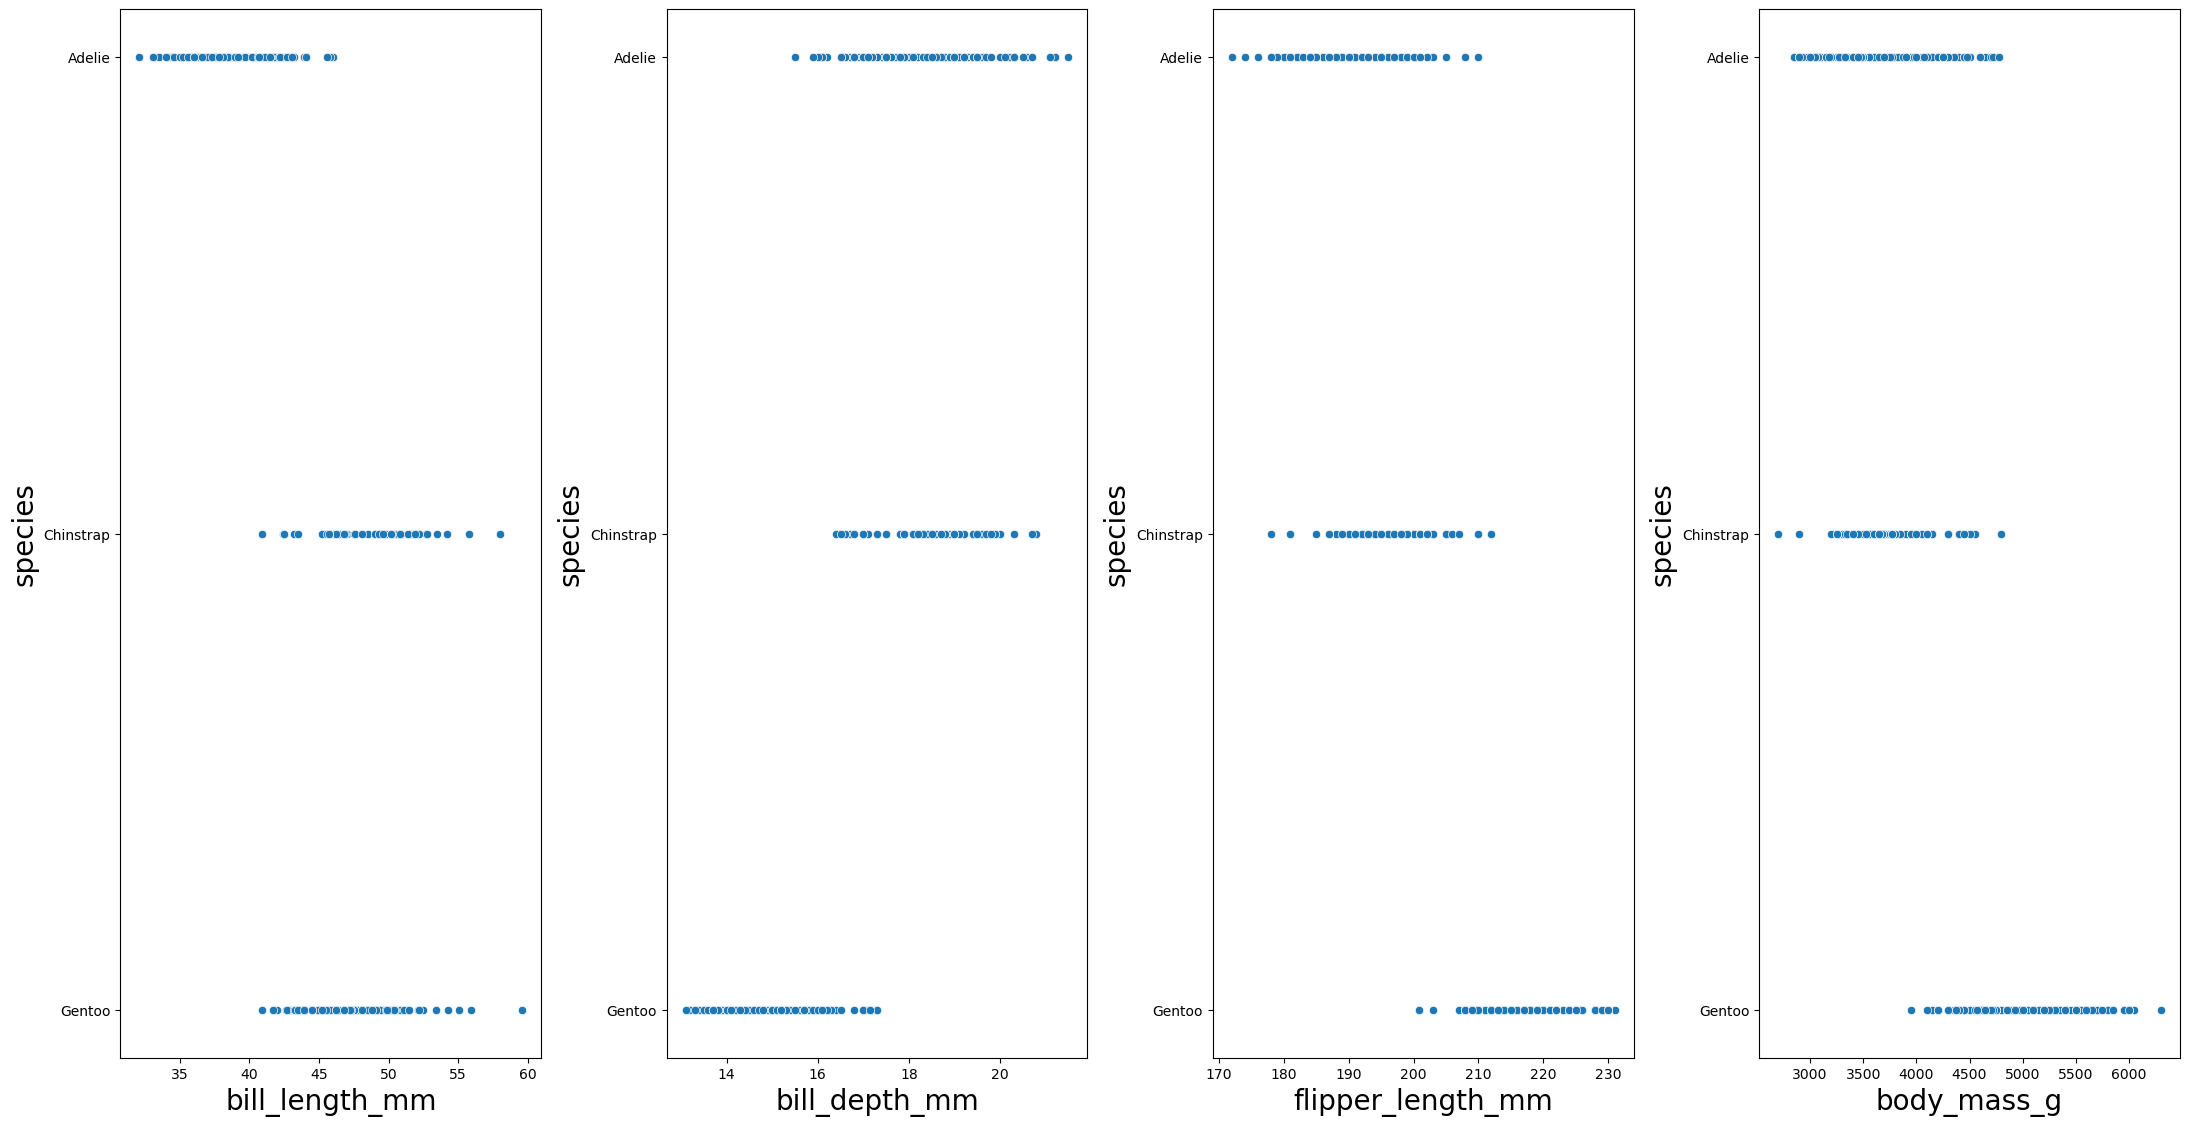

In [542]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 22))

num_cols = 4
num_rows = int(for_viz2.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz2.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=for_viz2, x=col, y='species')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('species', fontsize=20)

plt.tight_layout()
plt.show()

In [1]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(for_viz2.corr(), cmap='RdBu', annot=True, fmt=".2f");

NameError: name 'plt' is not defined

#### Q2.3 Discussing the preliminary observations from the above Visualizations

When we observe our scatterplot, for instance the bill length, we can see that for the Adelie specie, they tend to have a lower bill length as opposed to Gentoo and Chinstrap. But then if we notcie the bill depth, Gentoo species seems to have a lower one. 

In [543]:
for_viz2.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


After getting the five data summary of the numerical data, I observed that the mean bill length is approximately 43.92 mm, bill depth is about 17.15 mm, flipper length is around 200.92 mm, and body mass is approximately 4201.75 grams, and what this really showsus is the average size and weight of the penguins. 

#### Q2.4 Building a classification Model.

In [544]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [554]:
# Fitting the Logistic Regression model
logisticRegr = LogisticRegression(max_iter=1000)


In [555]:
logisticRegr.fit(X_train, y_train)

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [556]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1], dtype=int64)

In [557]:
logisticRegr.predict(X_test[0:10])

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2], dtype=int64)

In [558]:
predictions = logisticRegr.predict(X_test)

In [559]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

1.0


In [560]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[32  0  0]
 [ 0 16  0]
 [ 0  0 21]]


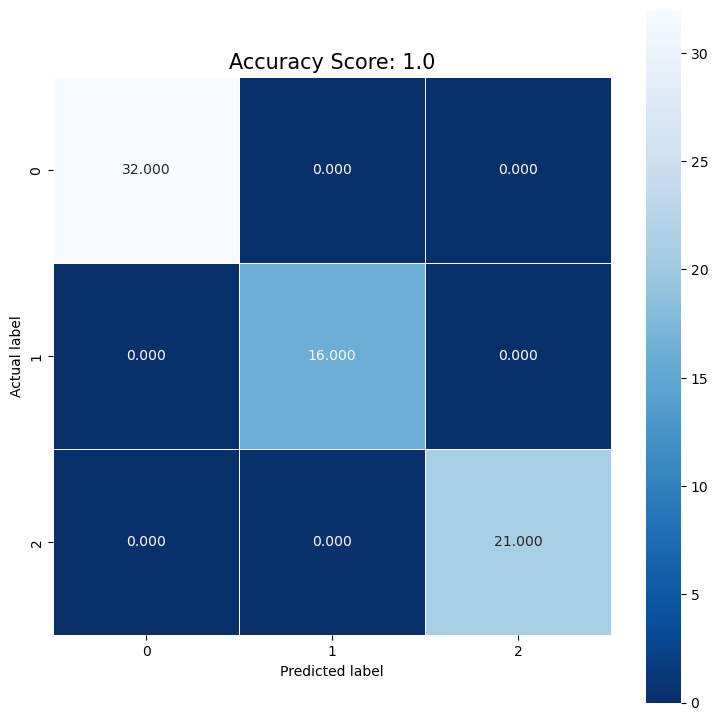

In [561]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Q 2. 5 Evaluating and discussing the model

After using score to get the accuracy of the model, we got a perfect accuracy of 1.0, which means that the model correctly classified all samples in the test set.
Also, from the confusion matrix, we can see that the model achieved perfect classification performance on the test set, because it correctly predicted all samples for each class without any misclassifications.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

#### 1. My experience
Engaging in this activity was quite enriching as it allowed me to apply various data preprocessing techniques as i did in Lab 1, although i also had to deal with missing values, so i needed to understand the various process involved in dealing with them when appropriate. Also, building two classification models, and evaluating its performance.
#### 2. Important of learning this activity
I think that these kinds of learning exercises are essential for anyone working in machine learning and data analysis. It is essential to comprehend preprocessing and data cleaning in order to guarantee the dependability and caliber of analytical outcomes.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab2.ipynb** to the **Lab 2 - Binary and Multi-class Classification Using Logistic Regression (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                  | Excellent                                                   | Good                                                        | Average                                                    | Below Average                                               | Poor                                                        | No Attempt                                                 |
|--------------------------------------------|-------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|
| **Part 1:** Activity-Question 1.1           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.2           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.3           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.4           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.5           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.1           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.2           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.3           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.4           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.5           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 2:** Reflection                      | **10 points** - Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points** - Reflection mostly ties to the module content; experience & importance are discussed | **6 points** - Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points** - Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points** - Minimal effort to tie to content; minimal effort to describe experience/importance | **0 points** - Did not complete the reflection                 |
